## Paso 1 y 2: Preparación de datos

Importamos todas las librerías que vamos a necesitar para nuestro proyecto y abrimos el archivo en csv

In [2]:
import pandas as pd
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('/datasets/games.csv')

Queremos ver la característica de nuestros datos y si tenemos datos nulos o faltantes para poder decidir qué hacer con ellos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Debemos poner en minúsculas todos los nombres de las columnas. Para ello, utilizamos .str.lower()

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


En user_score, el tipo de datos debería ser numérico, no object, así que lo modificamos.

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Queremos saber si hay valores TBD en las columnas, así que verificamos que no los hayan.

In [8]:
(df == 'tbd').sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Queremos saber cuántos son los NaN que hay en nuestra columna 'year_of_release'

In [9]:
print(df['year_of_release'].isna().sum())

269


Tenemos 269 datos nulos frente a 16715. Podríamos decir que como no es una muestra significativa para el análisis podríamos eliminarlos.

In [10]:
df = df.dropna(subset=['year_of_release'])

In [11]:
df_copy = df.copy()
df = df_copy #para seguir trabajando con el mismo nombre

Vemos que 'year_of_release' está en formato float, así que debemos ponerlo en formato entero.

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Adicionalmente, vemos que la columna name y genre tienen dos datos menos, por lo cual, decidimos eliminarlos desde la columna name, porque si no tenemos el nombre ni género del videojuego, no nos sirve de nada tenerlo en nuestro dataset.

In [13]:
df.dropna(subset=['name'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Como tenemos al menos 60 % de valores faltantes en las columnas user_score y critic_score, no podemos hacer una imputación, así que debemos trabajar con los valores faltantes para no alterar la muestra.

Por otra parte, debemos revisar si existen filas completas duplicadas en nuestro dataset con .duplicated().sum(). Si tenemos duplicados completos, los eliminamos, de lo contrario lo dejamos.

In [15]:
df.duplicated().sum()

0

Queremos calcular las ventas totales para cada juego:

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Paso 3: Análisis de datos

#### 1. Juegos lanzados por año. 
Como necesitamos saber cuántos juegos fueron lanzados en los diferentes años, cogemos la columna de year_of_release de nuestro dataset y contamos cuantos hay por cada uno.

In [17]:
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Para sabe si estos datos son significativos, graficamos. Utilizamos un gráfico de barras para ver el comportamiento año a año.

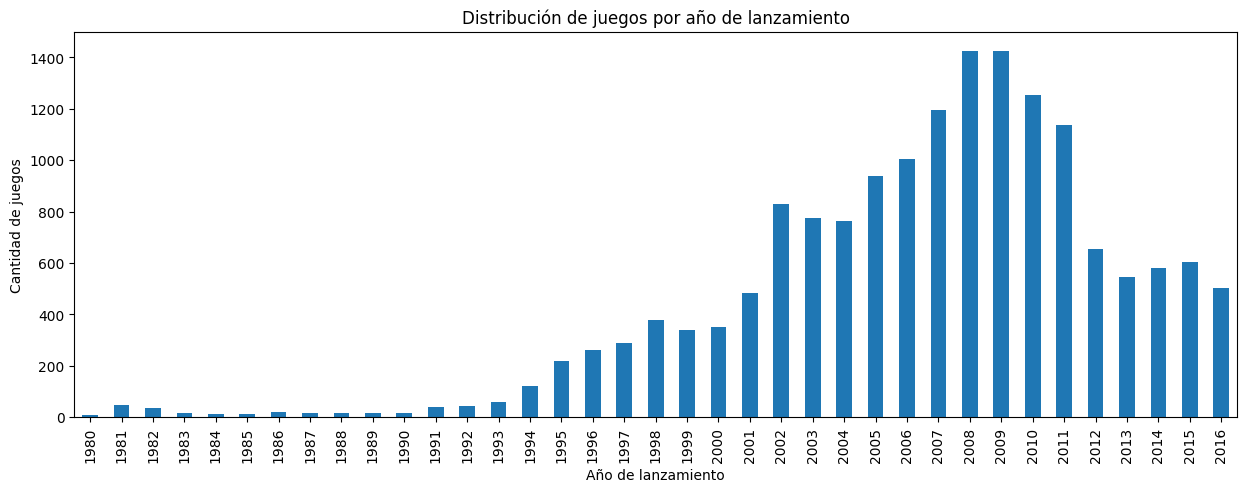

In [18]:
games_per_year.plot(kind='bar', figsize=(15,5))
plt.title('Distribución de juegos por año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.show()

Podemos darnos cuenta de que los datos empiezan a ser significativos a partir del 2000, a partir del cual comienzan a lanzarse más videojuegos por año. Si quisiéramos, podríamos acotar los datos desde 2000 a 2016 para tomar la muestra más representativa. 

Sin embargo, considero que ver todos los años nos permite evidenciar a partir de qué año empieza el boom de los videojuegos (casi a mediados de la década de los 90) y ha ido aumentando considerablemente a través de los años hasta 2007, que empieza a estabilizarse, y desciende a partir del 2012.

Asimismo, vemos que se alcanza un pico alrededor de 2007-2009 y a partir de 2011 hay una disminución.

#### 2. Plataformas con mayores ventas totales.
Para saber cómo varían las ventas de una plataforma a otra, primero debemos hayar las plataformas con mayores ventas totales. Para ello, agrupamos por plataforma y luego sumamos por ventas totales.

In [19]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

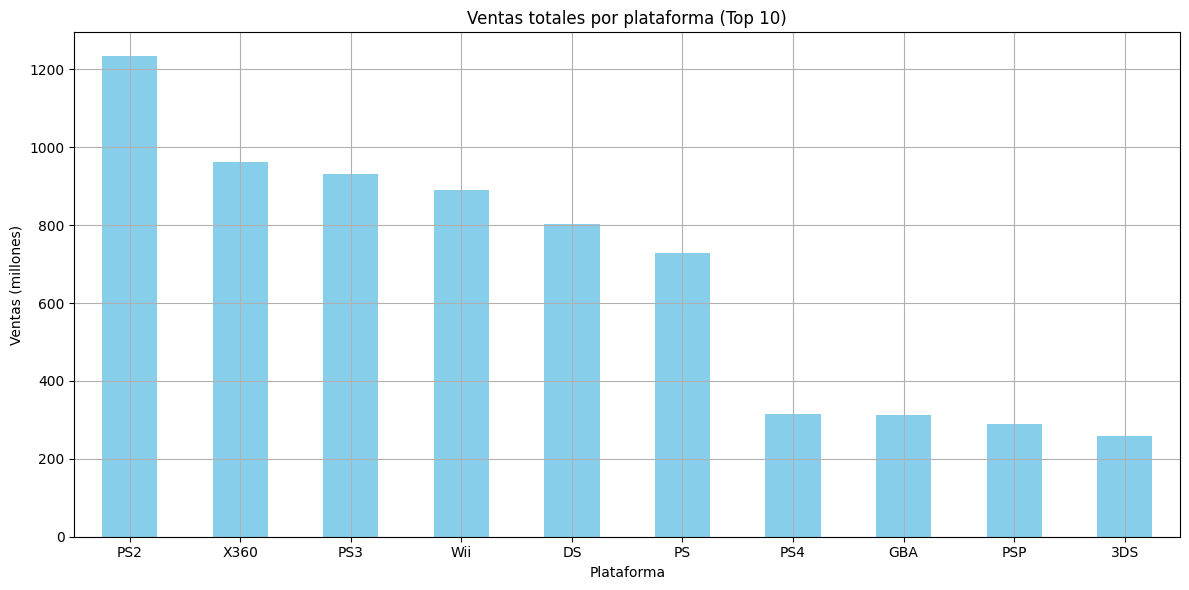

In [20]:
platform_sales.head(10).plot(kind='bar', figsize=(12,6), color='skyblue', grid=True)
plt.title('Ventas totales por plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Las plataformas con mayores ventas globales son PS2, X360, PS3, Wii y DS. Sin embargo, algunas ya no están activas o tienen ventas que han disminuido notablemente en los últimos años. Esto se puede deber a que hayan versiones actualizadas de esas consolas y por ende ya no tengan tantas ventas como en años anteriores, o simplemente las descontinuaron.

#### Plataformas que solían ser populares y ahora no.
Para ello, podemos averiguar cuántos años duraron las plataformas activas y que siguen aún vigentes en el 2016.

In [21]:
platform_life = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['vida_util'] = platform_life['max'] - platform_life['min']
platform_life.sort_values(by=['max', 'min'], ascending=False).head(10)

,min,max,vida_util
platform,,,
PS4,2013,2016,3
XOne,2013,2016,3
WiiU,2012,2016,4
3DS,2011,2016,5
PSV,2011,2016,5
PS3,2006,2016,10
Wii,2006,2016,10
X360,2005,2016,11
PC,1985,2016,31


Algo que podría ser interesante saber es el promedio de la vida útil de una plataforma. Para ello, sacamos el promedio.

In [22]:
life_av = platform_life['vida_util'].mean()
life_av

7.612903225806452

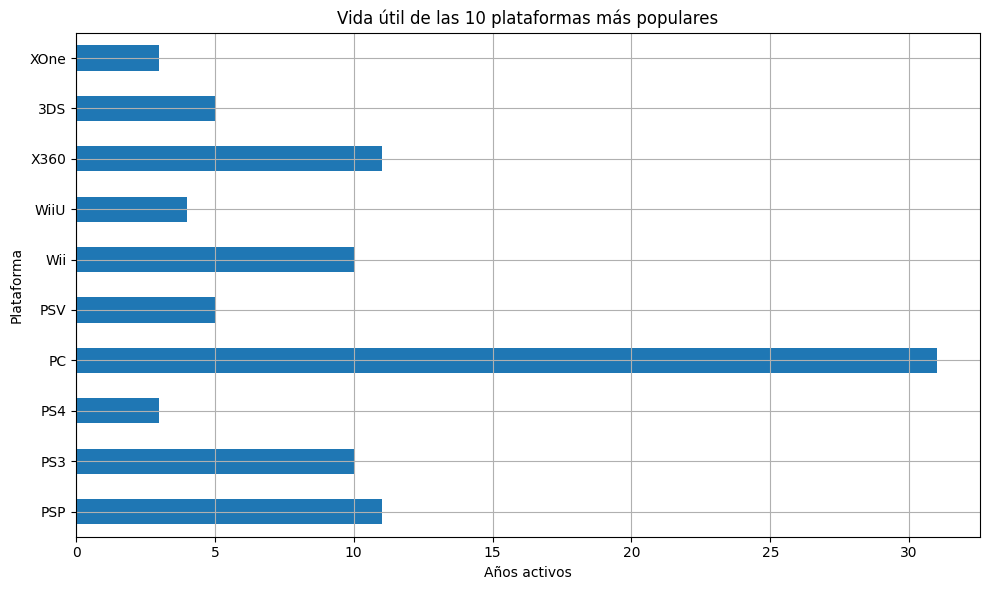

In [23]:
top10_life = platform_life.sort_values(by='max', ascending=False).head(10)

top10_life['vida_util'].plot(kind='barh', figsize=(10,6), grid=True)

plt.title('Vida útil de las 10 plataformas más populares')
plt.xlabel('Años activos')
plt.ylabel('Plataforma')
plt.gca().invert_yaxis()  # Invierte el orden para mostrar la más reciente arriba
plt.tight_layout()
plt.show()

Hasta acá podemos concluir algo muy interesante y es que, de las plataformas más populares que son PS2, X360, PS3, Wii y DS, aún siguen vigentes únicamente PS3, X360 y Wii. Sin embargo, hay versiones más actualizadas de estas, que aún siguen vigentes como son: PS4, XOne, WiiU. Así que todo nos da a entender que sus versiones pasadas, a pesar de haber sido populares durante casi 8 años, van a tender a desaparecer.

#### Construir un modelo para 2017

Debemos construir un modelo para 2017 teniendo en cuenta datos de años anteriores. Para ello, decidí tomar 2012 como año de referencia para la proyección, ya que es importante ver cómo es el comportamiento de las plataformas más recientes, desde que surgen hasta su evolución hasta el 2016. Adicionalmente, me permite ver mejor el auge y caida de ventas en plataformas modernas y construir un modelo confiable para predecir la tendencia en 2017.

In [24]:
df_fil = df[df['year_of_release'] >= 2012]

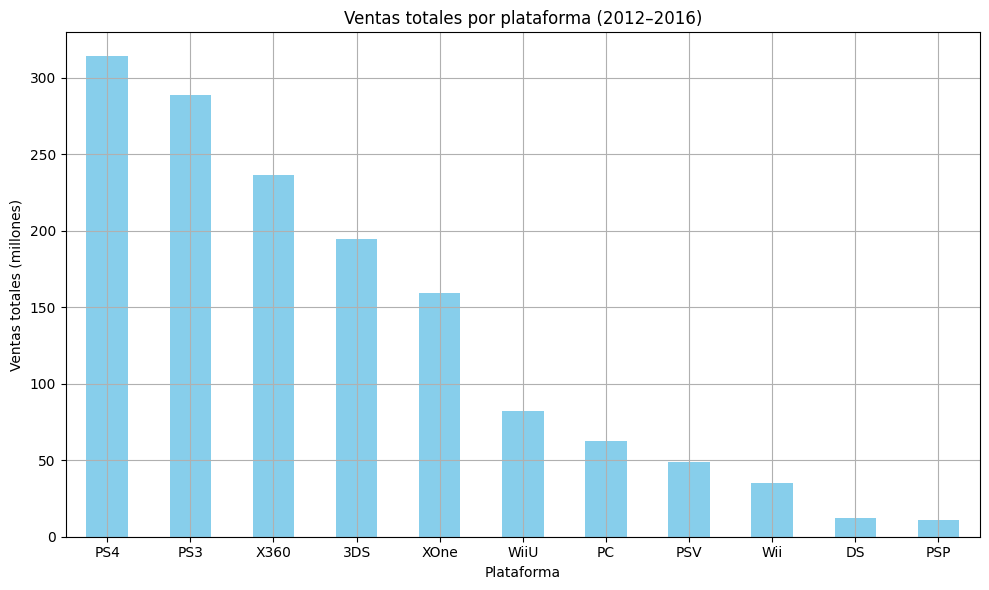

In [25]:
platform_sales_recent = df_fil.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_recent.plot(kind='bar', figsize=(10,6), color='skyblue', grid=True)

plt.title('Ventas totales por plataforma (2012–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Ahora, vamos a analizar la tendencia de ventas por año y plataforma desde 2006.

In [26]:
sales_per_year = df_fil.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

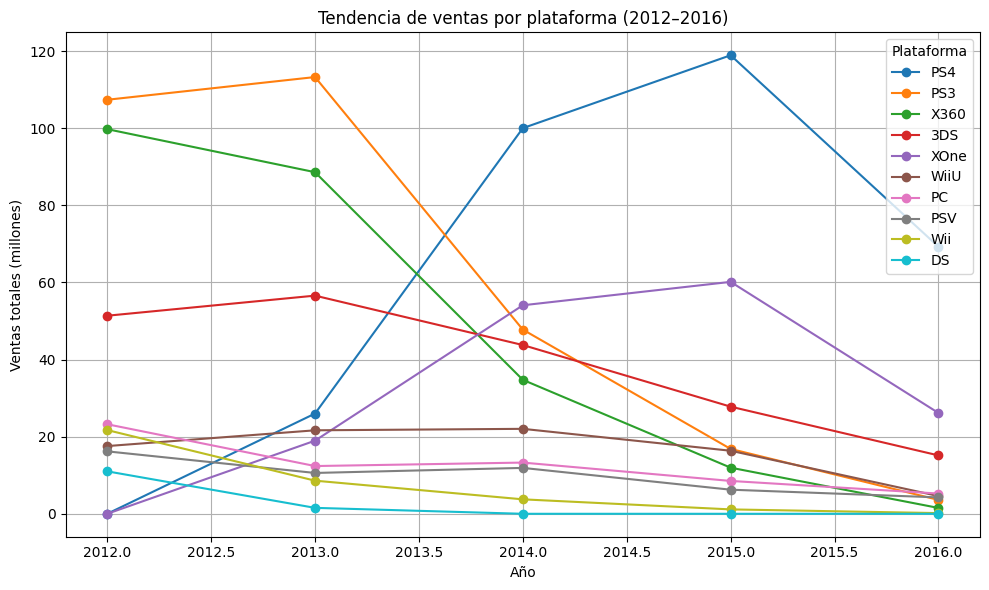

In [27]:
top_platforms = platform_sales_recent.head(10).index.tolist()
top_sales = sales_per_year[top_platforms]

top_sales.plot(figsize=(10,6), marker='o', grid=True)

plt.title('Tendencia de ventas por plataforma (2012–2016)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

Revisando los datos y nuestro gráfico, vemos que PS4 y XOne muestran un crecimiento claro desde 2013, mientras que 3DS sigue activa, pero sus ventas parecen estabilizarse o disminuir. Sin embargo, plataformas como PS3 y X360 están desapareciendo.

Podemos notar, también, con el gráfico que las versiones nuevas de las plataformas son lanzadas alrededor de 4 años antes de que reduzcan del todo sus ventas. Esto lo podemos notar con PS3 y X360 que empezaron su decaimiento cuando lanzaron PS4 y XOne en 2013.

Basándonos en el comportamiento de las ventas totales y tendencias de crecimiento, los esfuerzos para el 2017 deben ir dirigidos hacia las plataformas más prometedoras que son: PS4 porque tiene una alta cuota de mercado, su crecimiento es más sostenido y es la versión más reciente de las consolas PS. XOne es la segunda en ventas recientes y su crecimiento viene desde 2013.

### Realizamos un diagrama de caja
Queremos ver las ventas globales de todos los videojuegos desglosado por plataforma.

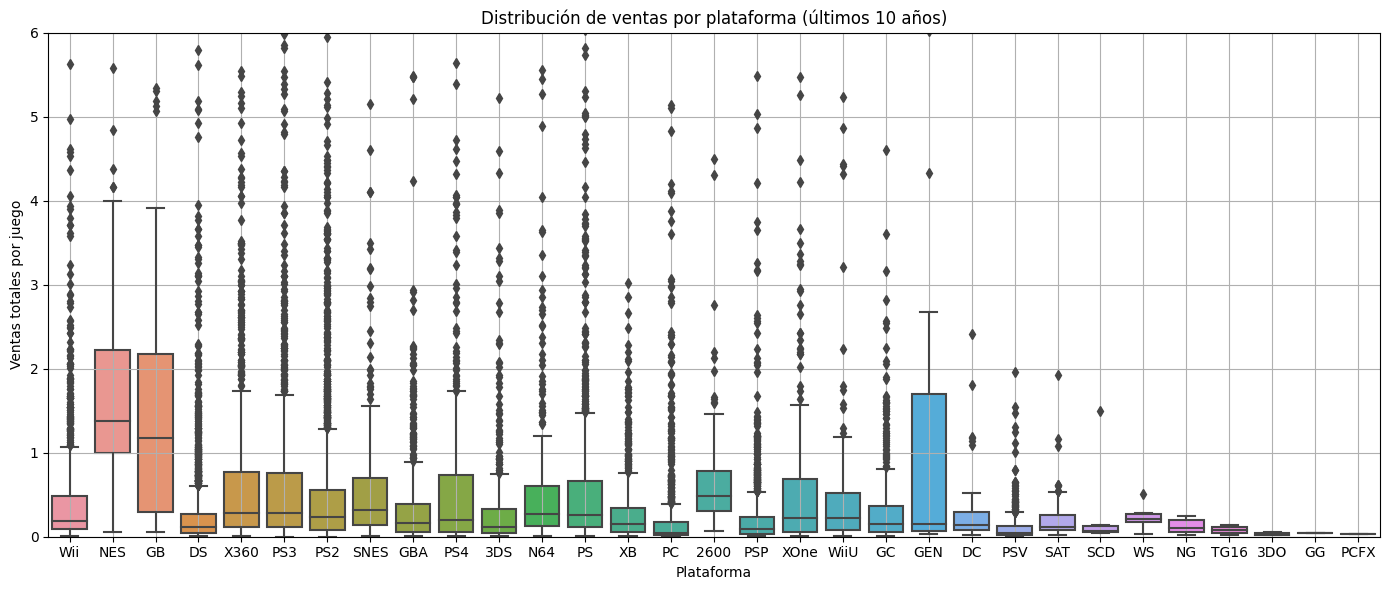

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Distribución de ventas por plataforma (últimos 10 años)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales por juego')
plt.ylim(0, 6)
plt.grid()
plt.tight_layout()
plt.show()

Observando nuestro diagrama de caja, podemos ver que muchas de las plataformas tienen valores que se extienden por fuera de su intervalo intercuartílico. Esto, nos da a entender que muchas de ellas tuvieron superventas en videojuejos, lo que se refleja en los valores por fuera de los bigotes, ya que están concentrados y más extendidos hacia las altas ventas. 

Plataformas como: PS2, X360 y PS3 presentan una gran cantidad de juegos con ventas muy altas (outliers), lo cual indica que fueron populares y con títulos exitosos. La mediana de ventas en estas plataformas también es más alta, sugiriendo un mejor rendimiento promedio.

### Escogemos una plataforma popular
Para este caso, escogí la más popular recientemente y que tuvo un boom en ventas, la PS4

In [29]:
ps4 = df[df['platform'] == 'PS4']

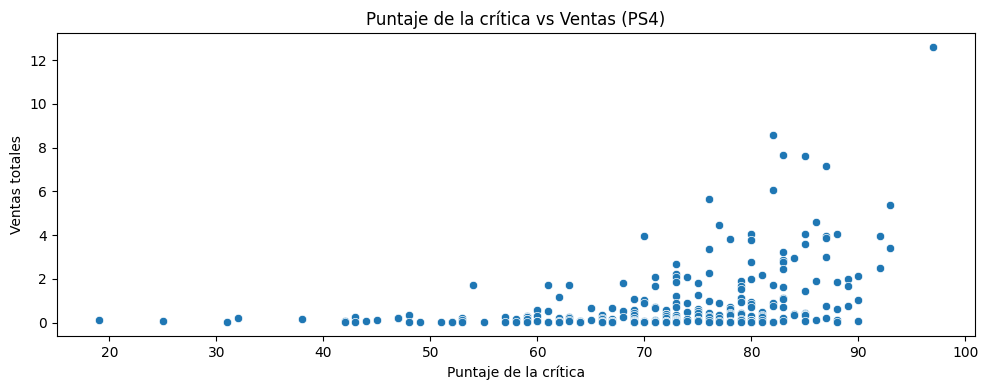

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title('Puntaje de la crítica vs Ventas (PS4)')
plt.ylabel('Ventas totales')
plt.xlabel('Puntaje de la crítica')
plt.tight_layout()
plt.show()

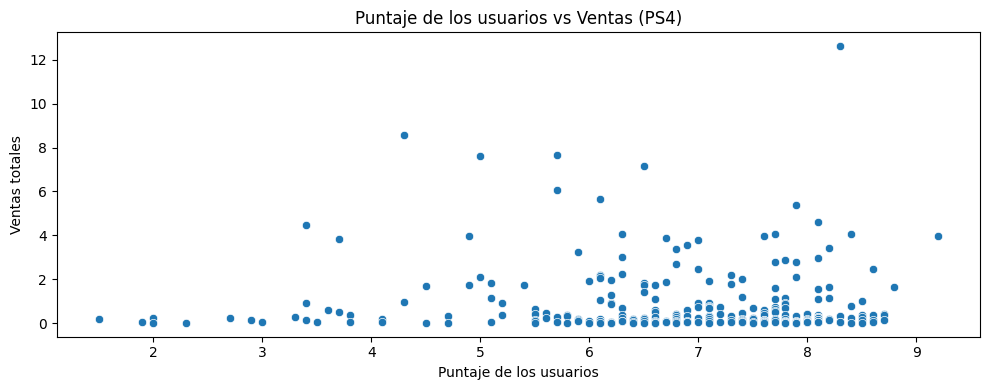

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.title('Puntaje de los usuarios vs Ventas (PS4)')
plt.ylabel('Ventas totales')
plt.xlabel('Puntaje de los usuarios')
plt.tight_layout()
plt.show()

Ahora, queremos ver como afecta la crítica a las ventas. Para ello, utilizamos el método .corr() para ver la correlación entre el puntaje en la decisión de compra de los usuarios.

In [32]:
print("Correlación puntaje de la crítica con las ventas totales:", ps4['critic_score'].corr(ps4['total_sales']))
print("Correlación puntaje de los usuarios con las ventas totales:", ps4['user_score'].corr(ps4['total_sales']))

Correlación puntaje de la crítica con las ventas totales: 0.40656790206178095
Correlación puntaje de los usuarios con las ventas totales: -0.031957110204556376


De acuerdo con lo que vemos en nuestros gráficos de dispersión y el resultado de la correlación, podemos afirmar que las puntuaciones de la crítica afectan moderadamente las ventas en videojuegos de las plataformas en general. Esto puede deberse a que, puede que algunos usuarios tengan en cuanta estas calificaciones antes de comprar un videojuego. Los juegos que reciben mejores críticas tienden a vender más, aunque no de forma determinante. Puede haber otros factores influyendo, como marketing, franquicia, etc.

Sin embargo, notamos que el puntaje de los usuarios no afecta en nada la decisión de compra de los usuarios en general. Esto se puede deber a que este tipo de calificaciones se otorgan después de comprados los videojuegos, no antes, a diferencia de la crítica que sale casi inmediatamente se lanza un videojuego.

### Comparación de juegos entre plataformas

Vamos a elegir algunos juegos populares con ventas altas y diferentes plataformas. Para ello, primero verificamos qué juegos están en más de una plataforma.

In [33]:
platform_games = df.groupby('name')['platform'].nunique()
platform_games = platform_games[platform_games > 1]

In [34]:
pop_games = df[df['name'].isin(platform_games.index)]
pop_games = pop_games.groupby('name')['total_sales'].sum()
pop_games = pop_games[pop_games > 1].sort_values(ascending=False)
pop_games.head(10)

name
Grand Theft Auto V                56.58
Super Mario Bros.                 45.31
Tetris                            35.84
Call of Duty: Modern Warfare 3    30.60
Call of Duty: Black Ops II        29.40
Call of Duty: Black Ops           29.20
Call of Duty: Ghosts              27.39
Super Mario World                 26.09
Call of Duty: Black Ops 3         25.67
Call of Duty: Modern Warfare 2    24.97
Name: total_sales, dtype: float64

In [35]:
pivot_table = df[df['name'].isin(pop_games.head(5).index)].pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

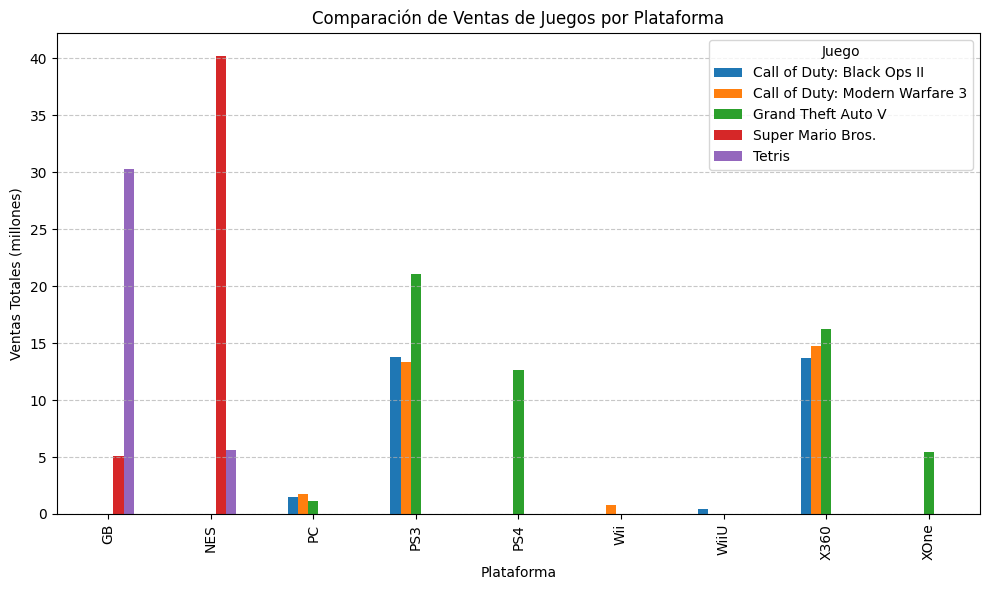

In [65]:
pivot_table_T = pivot_table.T

pivot_table_T.plot(kind='bar', figsize=(10, 6))

plt.title('Comparación de Ventas de Juegos por Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xlabel('Plataforma')
plt.legend(title='Juego', loc='upper right')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

Podemos indicar con este gráfico: en primer lugar, Super Mario Bros es mucho más exitoso en plataforma NES que en GB, con más de 40 millones en copias. Juegos como Tetris, por el contrario, es mucho más exitoso en GB que en NES. Grand Theft Auto V  es el gran lider multiplataforma en consolas como PS3, PS4, X360 y XOne. Call of Duty, en sus dos versiones más populares, vendió muy bien en PS3 y Xbox 360, pero menos en otras.

Por otra parte, podemos decir que PC no fue la plataforma principal para ninguno de estos 5 juegos (ventas marginales). Plataformas como Wii y Wii U casi no figuran en ventas de estos juegos, quizá porque no eran el target principal.

Podemos concluir, entonces, que los juegos más familiares (Mario y Tetris) venden muy bien en plataformas como Nintendo (NES y GB). Mientras que juegos de shooting y acción venden mejor en plataformas como Sony y Microsoft.

### Análisis por género

Para poder saber de cuánto son las ventas totales por cada tipo de videojuego, agrupamos los datos y graficamos.

In [37]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

In [38]:
genre_sales.sum()

8814.369999999919

Podemos revisar cuál es la participación en ventas por género, para poder explicar mejor cómo influye en el mercado en general.

In [39]:
genre_sales / genre_sales.sum()

genre
Action          0.194741
Sports          0.148584
Shooter         0.118143
Role-Playing    0.105632
Platform        0.093660
Misc            0.089659
Racing          0.082081
Fighting        0.050220
Simulation      0.044014
Puzzle          0.027216
Adventure       0.026472
Strategy        0.019578
Name: total_sales, dtype: float64

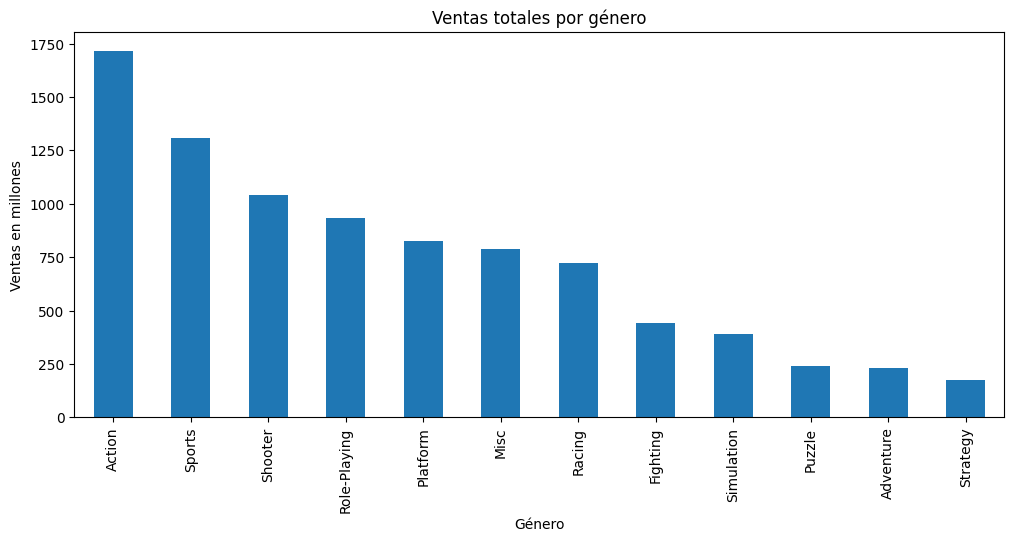

In [40]:
genre_sales.plot(kind='bar', figsize=(12,5), title='Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas en millones')
plt.show()

Podemos destacar que los videojuegos más vendidos son del género Action, los cuales aportan casi el 20% de las ventas en el mercado global. Esto, se puede deber a que son el tipo de títulos con más fuerte inversión en publicidad y desarrollo. Asimismo, son videojuegos altamente atractivos, variados y visualmente impactantes.

El siguiente más popular es el de Sports, que aporta casi el 15% de las ventas globales en videojuegos. Esto se puede deber a que tienen un recambio anual, como por ejemplo, los viddeojuegos de futbol o de F1, donde los jugadores de equipo (personajes) cambian de equipo o escudería y por ende se hace necesario actualizarlos. Adicionalmente, son más fáciles de entender y jugar.

En cuanto a los de tiro, aportan el casi 12% de las ventas en el mercado global, lo puede deberse a que son más adictivos, con un componente social fuerte y son altamente competitivos.

Por el contrario, los juegos menos populares como los de Adventure y Strategy aportan cuotas muy bajas al mercado global (alrededor del 2% cada uno). Esto puede deberse a que son juegos menos comerciales, más centrados a cierto tipo de jugadores fieles y puede que estén diseñados para PC o cierto tipo de consola poco popular.

In [41]:
genre_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_sales

genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64

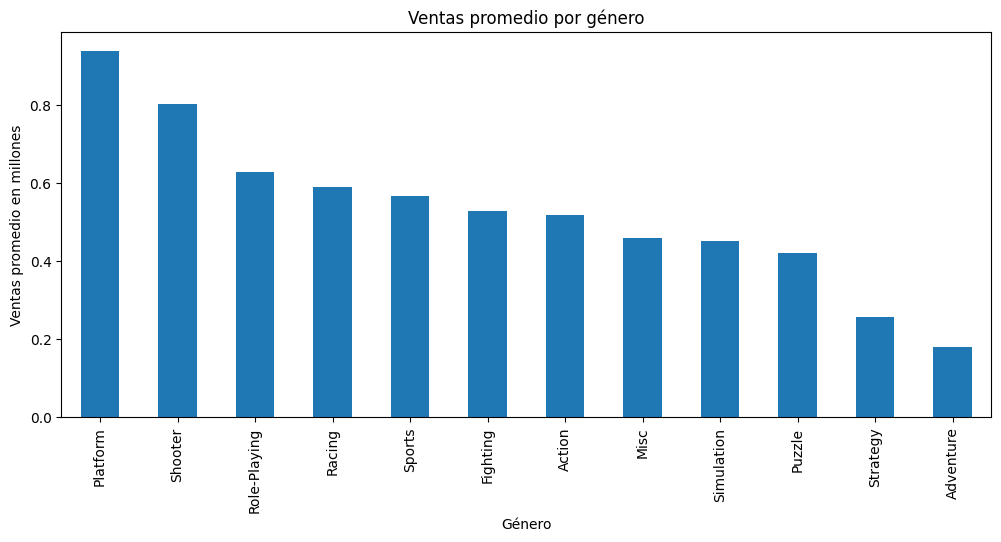

In [42]:
genre_sales.plot(kind='bar', figsize=(12,5), title='Ventas promedio por género')
plt.xlabel('Género')
plt.ylabel('Ventas promedio en millones')
plt.show()

Revisando nuestro gráfico de ventas promedio por género, podemos decir que Plataform es el género con mayor promedio de ventas por juego, seguido por Shooter y Role-Playing. Géneros como Strategy y Adventure tienen ventas promedio más bajas. Esto quiere decir que, aunque no haya tantos juegos de Platform, los que existen venden muy bien.

Comparando con nuestro gráfico anterior, podemos ratificar que géneros como Adventure o Strategy pueden tener muchos juegos, pero en promedio venden poco por título.

## Paso 4: Crea un perfil de usuario para cada región

### Las 5 plataformas por región

In [43]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\nTop de ventas por plataforma en {region}")
    print(df.groupby('platform')[region].sum().sort_values(ascending=False).head(5))


Top de ventas por plataforma en na_sales
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top de ventas por plataforma en eu_sales
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top de ventas por plataforma en jp_sales
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


Teniendo en cuenta el top 5 de plataformas más populares por región, podemos establecer que PS2 es la consola estrella, ya que cuenta con un número de ventas que supera los 500 millones de dólares en Norte América, los 300 millones en Europa y los 100 millones en Japón. Esto, puede deberse a que Sony es la compañía con más popularidad a nivel mundial, con juegos que son y han sido top en el mercado desde hace más de 20 años.

Por otra parte, vemos que plataformas como X360 son únicamente populares en Norte América y en Europa, lo que tiene sentido porque es una Xbox es una plataforma estadounidense y sus jugadores se concentran más que todo en EEUU, a la cabeza.

Finalmente, podemos decir que las consolas japonesas son las más populares en Japón. Vemos una alta preferencia por las consolas portátiles como la DS, que puede deberse a estilos de vida japoneses. A diferencia de los otros dos mercados, donde no son tan populares, probablemente, porque son consolas más viejas y el nivel de consumo en estas es más propenso a consumir productos nuevos.

### Los 5 géneros principales

In [44]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\nTop de ventas por género en {region}")
    print(df.groupby('genre')[region].sum().sort_values(ascending=False).head(5))


Top de ventas por género en na_sales
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top de ventas por género en eu_sales
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top de ventas por género en jp_sales
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Viendo las ventas por género, existe un claro patrón en las preferencias por los géneros de acción en Norte América y Europa. Les siguen, además, con una fuerte demanda, los juegos de deportes y tiro. Lo que nos demuestra quiénes halan la tendencia en nuestro análisis del paso 3.

A diferencia de estas dos regiones, Japón tiene una fuerte tendencia por el consumo de juegos de rol, duplicando su consumo a los otros tres que son preferencia en las regiones occidentales.

### ESRB Rating por región

In [45]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f"\nVentas por ESRB Rating en {region}")
    print(df.groupby('rating')[region].sum().sort_values(ascending=False))


Ventas por ESRB Rating en na_sales
rating
E       1274.24
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Ventas por ESRB Rating en eu_sales
rating
E       703.87
M       480.00
T       421.79
E10+    183.35
AO        0.61
K-A       0.27
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

Ventas por ESRB Rating en jp_sales
rating
E       197.96
T       150.70
M        63.58
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


Evaluando estos resultados vemos que el mercado norteamericano bastante amplio y diverso. Claramente prefiere de lejos juegos aptos para todas las edades, por encima de aquellos con clasificación para adolescentes y mayores de 17 años. Sin embargo, hay una fuerte demanda por juegos para los juegos con estas dos últimas clasificaciones, lo que nos puede dar a enternder que los mayores consumidores en Norte América son los jóvenes.

De igual manera, vemos un comportamiento muy similar en Europa, aunque con menos ventas en general. Los juegos para todos son los más populares, pero también existe una demanda razonable por títulos para jóvenes adultos.

En Japón, al igual que las otras dos regiones, el mercado está claramente dominado por juegos para todos los públicos. Esto refuerza el perfil más familiar y juvenil del mercado japonés.

## Paso 5: Prueba de hipótesis

### Xbox One vs PC user score

Cómo el ejercicio nos pide comparemos la calificación promedio de los usuarios de las plataformas XOne y PC, planteamos la hipótesis nula viendo si las medias son iguales, de lo nontratio (hipótesis alterna) nos indica que son diferentes.

Para esta prueba, utilizamos la prueba T de dos muestras independientes (ttest_ind), debido a que estamos comparando la clasificación de usuarios de dos consolas distintas: de XOne y de PC.

In [46]:
# H0: no hay diferencia en calificaciones promedio entre plataformas
# H1: sí hay diferencia en calificaciones promedio entre plataformas

xone = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

alpha = 0.05
result = stats.ttest_ind(xone, pc)

print('p-valor:', result.pvalue)

if result.pvalue < alpha:
    print('Rechazamos H0: Las medias son diferentes')
else:
    print('No se puede rechazar H0: Las medias podrían ser iguales')

p-valor: 1.3037979620149106e-05
Rechazamos H0: Las medias son diferentes


Como podemos darnos cuenta, en este caso, la hipótesis nula se rechaza. Esto indica que los usuarios valoran los juegos de manera distinta dependiendo de si están en XOne o PC.

### Acción vs Deportes

Lo mismo para este caso, en donde nos piden comparar la calificación promedio de los usuarios de los juegos de acción y de deportes. Así que planteamos la hipótesis nula viendo si las medias son iguales, de lo nontratio (hipótesis alterna) nos indica que son diferentes.

Al igual que nuestro caso anterior, utilizamos la prueba t para comparar las clasificaciones de los usuarios de los juegos de Acción y los de Deportes, que son distintos.

In [47]:
# H0: no hay diferencia en calificaciones promedio entre los juegos de Acción y de Deportes
# H1: sí hay diferencia en calificaciones promedio entre los juegos de Acción y de Deportes

action = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score']

alpha = 0.05
result2 = stats.ttest_ind(action, sports)

print('p-valor:', result2.pvalue)

if result2.pvalue < alpha:
    print('Rechazamos H0: Las medias son diferentes')
else:
    print('No se puede rechazar H0: Las medias podrían ser iguales')

p-valor: 0.06480928064420527
No se puede rechazar H0: Las medias podrían ser iguales


Sin embargo, acá es distinto porque vemos que la hipótesis nula no se rechaza. Esto sugiere que, en promedio, los usuarios califican ambos géneros de forma similar.

## Paso 6: Conclusiones generales

Para resumir, podemos decir que, de las plataformas más populares a través del tiempo, siguen vigentes a 2016: PS3, X360 y Wii.

Vimos que la duración promedio de vida de una plataforma es de 8 años y que al lanzar una nueva versión de la misma, dura entre 3 y 4 años en promedio para dejar de vender videojuegos de esa plataforma.

De igual forma, pudimos ver que el boom de los videojuegos comenzó en el 2002 y que los años con mayores lanzamientos en videojuegos fueron el 2008 y el 2009, con 1426 juegos en promedio, los más altos de la historia. A partir del 2012, los lanzamientos de videojuegos cayeron significativamente.

Por otra parte, en nuestro análisis por región, nos dimos cuenta que en Norte América y Europa prefieren las plataformas de Sony (PS), así como las de Xbox (que es más fuerte en NA por su naturaleza de origen). En cambio, en Japón, prefieren las consolas japonesas, estando a la cabeza las portátiles (DS), seguidas por las de Sony (PS).

Asimismo, notamos que los juegos que más se consumen a nivel global son los de Acción, Deportes y Tiro.  Siendo estos tres, los mayormente consumidos en Norte América y Europa. A diferencia del mercado japonés que prefiere en mayor medida los juegos de roll.

También pudimos notar que existe una correlación moderada entre las calificaciones de los usuarios y la crítica al momento de comprar un videojuego. Así que las decisiones de los usuarios pueden verse afectados por este factor.